# **<p align="center"><font size=5 color=#006600>Diplomado en Ciencia de Datos**

# **<p align="center"><font size=5 color=#FF0033>Agrupamiento con *K-means* y el método de Ward a partir de coordenadas factoriales**

<img src="../Imagenes/espaciosRpRn.png" alt="drawing" width="700"/>

![Tomada de: Dray and Dufour 2007. The ade4 Package: Implementing the Duality Diagram for Ecologists](https://www.jstatsoft.org/index.php/jss/article/view/v022i04/192)

<img src="../Imagenes/clasVarNom.png" alt="drawing" width="800"/>

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co

# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

# **<font size=5 color=#0000FF>Asistentes**

1. Jessica López Mejia, jelopezme@unal.edu.co

**Nota:** los trozos de código de este cuaderno son de R

## **Contenido**

* [Objetivos de los métodos de agrupamiento](#Objetivos-de-los-métodos-de-agrupamiento)
* [Métodos para obtener una partición directa](#Métodos-para-obtener-una-partición-directa)
* [Métodos de clasificación jerárquica](#Métodos-de-clasificación-jerárquica)
* [Combinación de métodos](#Combinación-de-métodos)
* [Clasificación a partir de coordenadas](#Clasificación-a-partir-de-coordenadas)
* [Caracterización automática de las clases](#Caracterización-automática-de-las-clases)
* [Ejemplo de aplicación: clasificación de los niños según el consumo cultural](#Ejemplo-de-aplicación:-clasificación-de-los-niños-según-el-consumo-cultural)

Fuente: Pardo CE (2020)  [Estadística descriptiva multivariada](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf )   

# **Objetivos de los métodos de agrupamiento**

Objetivo: descubrir patrones en los datos en forma de grupos  bien diferenciados, que tengan individuos homogéneos en su interior.

- En inglés: *Cluster Analysis* (análisis de conglomerados)
- *métodos de clasificación no supervisada*: en las áreas de minería de datos, aprendizaje automático y reconocimiento de patrones.
- En el sentido matemático un algoritmo de agrupamiento busca una partición de un conjunto de $n$ elementos en $K$ subconjuntos,
- Equivale a: definir una variable cualitativa que emerge de los datos.




## Tipos de métodos


1. Los que permiten obtener una partición directa mediante un algoritmo, entre los que el más conocido y utilizado es el *K-means*.

2. Los que construyen una sucesión de particiones anidadas, que se representan mediante un árbol o dendrograma, se conocen como métodos de clasificación jerárquica. 
    - Clasificación jerárquica aglomerativa: parten de todos los individuos, como $n$ clases de un elemento  y los van uniendo en pasos sucesivos hasta llegar a un solo grupo o clase de $n$ individuos. 
    - Clasificación jerárquica divisiva.

- Los algoritmos de clasificación requieren de medidas de similitud, disimilitud o distancia entre individuos y  entre grupos. 
- Las similitudes, disimilitudes o distancias entre grupos constituyen los criterios de agregación de los métodos de clasificación  jerárquica aglomerativa.
- Combinar los dos tipos de métodos de clasificación.


[Volver al inicio](#Contenido)

# Métodos para obtener una partición directa

## K-means

- Se da el número de clases, los puntos iniciales requeridos para empezar el algoritmo y un criterio de parada.
- Está relacionado con la geometría utilizada en los métodos en ejes principales porque recurre a la distancia Euclidiana entre individuos.
- La distancia entre grupos se calcula como la distancia Euclidiana entre sus  centros de gravedad. 
- Homogeneidad intra grupos: inercia intra. 
- Heterogeneidad entre grupos: inercia entre. 
- Inercia = inercia intra + inercia entre. 



## Descomposición de la inercia asociada a una partición

Sea una nube de $n$ puntos $N_n$ en $\mathbf{p}$ con una partición en $K$ clases.
$$
Inercia(N_n)=\sum_{i=1}^n p_i d^2(i,\mathbf{g}) =
 \sum_{k=1}^K p_k d^2(\mathbf{g}_k,\mathbf{g}) + \sum_{k=1}^K \sum_{i \in I_k } p_id^2(i,\mathbf{g}_k)
$$

- $p_i$: peso del individuo $i$, $\sum\limits_{i=1}^n p_i = 1$ 
- \mathbf{g}: centro de gravedad de la nube de puntos, $\mathbf{g}=\sum\limits_{i=1}^n p_i \mathbf{x}_i$,  $\mathbf{x'}_i$, es la fila $i$ de la matriz de coordenadas de los puntos $\mathbf{X}$ con $n$ filas y $p$ columnas.
- $p_k$ peso de la clase $k$, $p_k = \sum\limits_{i \in I_k } p_i$
- $\mathbf{g}_k$: centro de gravedad de la clase $k$,  $\mathbf{g}_k = \dfrac{1}{p_k}\sum\limits_{i \in I_k } p_i \mathbf{x}_i$
- $d^2(.,.)$] es la distancia Euclidiana canónica.

- En el cálculo de la inercia ha intervenido la distancia Euclidiana canónica, entonces la medida de disimilitud entre individuos ya está seleccionada.
- El método *K-means* busca una partición en $K$ clases que tenga inercia intra-clases mínima.


## El algoritmo $K-means$

0. Paso 0

- $K$ centros iniciales de las clases:  $\{C^{0}_{1},
C^{0}_{2},\ldots,C^{0}_{k},\ldots,C^{0}_{K}\}$
- Partición 0 $P^0=\{ I^{0}_{1}, I^{0}_{2},\ldots,
I^{0}_{k},\ldots,I^{0}_{K}\}$. 
- El individuo $i$ pertenece
a la clase $I^0_k$ si el punto $i$ está más próximo de $C^0_k$   que de
todos los demás centros.

1. Paso 1

- De las clases  $\{ I^{0}_{1}, I^{0}_{2},\ldots, I^{0}_{k},\ldots,I^{0}_{K}\}$
- $K$ centros de gravedad   $\{C^{1}_{1},C^{1}_{2},\ldots,C^{1}_{k},\ldots,C^{1}_{K}\}$ 
- Patición 1: $P^1=\{ I^{1}_{1}, I^{1}_{2},\ldots,
I^{1}_{k},\ldots,I^{1}_{K}\}$


- Paso $m$

- De las clases $\{ I^{m-1}_{1}, I^{m-1}_{2},\ldots,I^{m-1}_{k},\ldots,I^{m-1}_{K}\}$
-   $K$ nuevos centros  $\{C^{m}_{1}, C^{m}_{2},\ldots,C^{m}_{k},\ldots,C^{m}_{K}\}$
- Partición $m$: $P^m=\{ I^{m}_{1},
I^{m}_{2},\ldots,I^{m}_{k},\ldots,I^{m}_{K}\}$
. El algoritmo se detiene si la nueva partición no es mejor que la
anterior (la varianza intra-clases deja de disminuir)
- Generalmente la partición
obtenida depende de la selección inicial de los centros.



### El algoritmo *K-means*  disminuye la inercia intra-clases

- Hay que demostrar que: la inercia intra-clases de la partición $P^{m}=\{ I^{m}_{1}, I^{m}_{2},\ldots,I^{m}_{k},\ldots,I^{m}_{K}\}$ es menor o igual a la inercia intra-clases de la partición $P^{m-1}$ 

    - A cada individuo del conjunto a clasificar, se le asocia un peso
$p_i>0$ tal que $\sum\limits_{i=1}^np_i=1$.   
    - $d^2(i,C^m_k)$ es el cuadrado
de la distancia entre el individuo $i$ y el centro móvil de la clase $k$
en la etapa $m$, 
    - que es el centro de gravedad de la clase $k$ en el paso $m{-}1$.  
    - Entonces, la suma de las inercias de las clases  de la partición $P^m$ con respecto a los puntos que permitieron construirla  es  
$$
v(m)=\sum\limits_{k=1}^K
\sum_{i \in  I_k^m } p_i d^2(i,C_k^m)
$$

    - en la etapa $m$, $I_k^m$ es el conjunto de los  individuos que están más próximos a $C_k^m$ 
 que de todos los otros centros
    - el centro de gravedad de esta clase se calcula en la etapa $m+1$: $C_k^{m+1}=\mathbf{g}_k^m$.
    - La inercia intra-clases en la etapa $m$ es la cantidad
$$
V(m)= \sum_{k=1}^K \sum_{i \in I_k^m } p_id^2(i,\mathbf{g}_k^{m})
=\sum_{k=1}^K \sum_{i \in I_k^m } p_id^2(i,C_k^{m+1})
$$
    - donde $C_k^{m+1}$ es el centro de gravedad de la clase $I_k^m$, que es el nuevo centro móvil en la etapa $m+1$. 
    - $V(m)$ es menor o igual que $v(m)$  porque la inercia con respecto al centro de gravedad es siempre menor o igual a la inercia con respecto a cualquier otro punto.

    - La suma de las inercias con respecto a los puntos que originaron la partición $P^{m+1}$ es  
$$
\textbf{v}(m+1)=\sum_{k=1}^K \sum_{i \in I_k^{m+1} }
p_id^2(i,C_k^{m+1})
$$


   - $v(m+1)$  es menor o igual a $V(m)$  porque si al menos un individuo cambia de clase  en la nueva partición es porque queda más cerca de otro nuevo centro. 
    - Entonces 
$v(m+1)\leq V(m) \leq v(m) \leq V(m-1)$, es decir que la inercia intra-clases disminuye con cada paso del algoritmo. 

### Ejemplo de "juguete": $K{-}means$ ejemplo Café

Ejemplo Café partiendo de las coordenadas sobre el primer plano factorial del ACP normado de las tres variables físicas, partiendo de los cafés: ExCl y O40C, como centros iniciales. 


### Primer plano factorial y coordenadas

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Axis1,-0.89,2.68,1.18,1.14,-0.44,-2.47,0.98,0.15,-1.04,-1.29
Axis2,-1.68,-0.22,0.15,-1.02,-0.82,-0.04,1.01,1.31,0.65,0.67


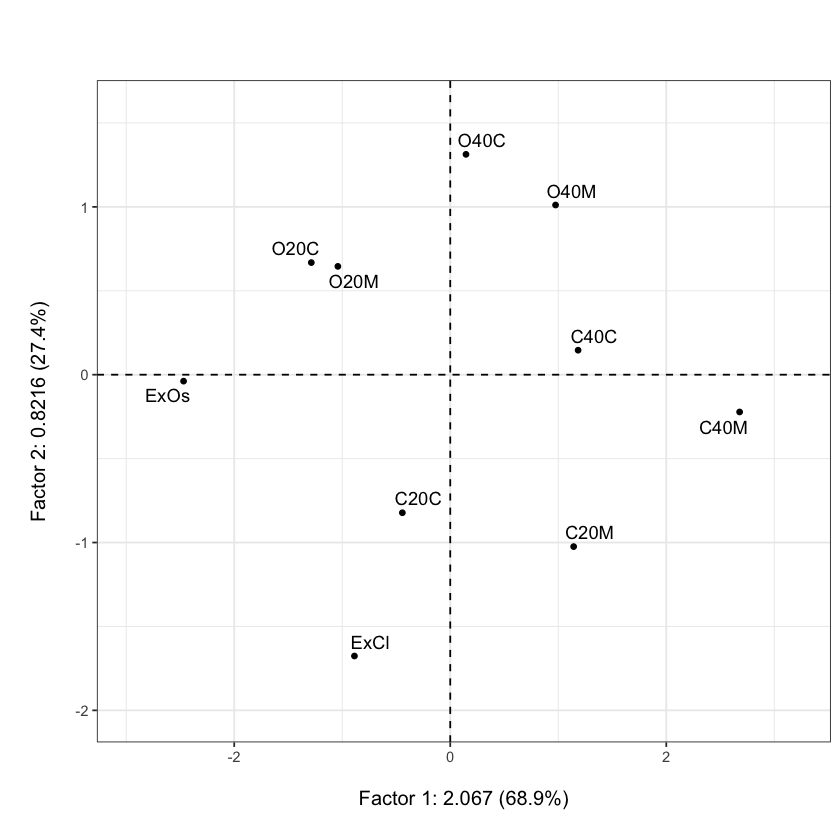

In [1]:
library(FactoClass)
data(cafe)
acp<-dudi.pca(cafe[1:10,1:3],scannf=FALSE)
plot(acp,Tcol=FALSE,gg=TRUE)
F<-as.matrix(round(acp$li,2))
t(F)




#### Paso 0
Puntos iniciales: ExCl y O40C

In [2]:

tab<-NULL# para para registrar los pasos 3 filas DC1, DC2, Partición
cen <- NULL# matriz para recoger los centros de cada paso, por columnas
"Centros iniciales"
C<-F[c(1,8),];rownames(C)<-c("C1","C2");C
"Distancias a los centros iniciales"
as.matrix(dist(rbind(F,C)))[11:12,1:10]->D;round(D,2)
"Partición"
factor(D[1,]>D[2,],labels=c("I1","I2"))->P; P
cen<-C
tab<-rbind(D,P);round(tab,2)

[1] "Centros iniciales"

,Axis1,Axis2
C1,-0.89,-1.68
C2,0.15,1.31


[1] "Distancias a los centros iniciales"

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
C1,0.00,3.86,2.76,2.13,0.97,2.28,3.28,3.17,2.33,2.38
C2,3.17,2.96,1.55,2.53,2.21,2.95,0.88,0.00,1.36,1.58


[1] "Partición"

ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C 
  I1   I2   I2   I1   I1   I1   I2   I2   I2   I2 
Levels: I1 I2

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
C1,0.00,3.86,2.76,2.13,0.97,2.28,3.28,3.17,2.33,2.38
C2,3.17,2.96,1.55,2.53,2.21,2.95,0.88,0.00,1.36,1.58
P,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00


#### Pasos 1 a 3

In [3]:
for (paso in 1:3){
    print(paste("Cálculo de los centros del paso",paso))
    centroids(F,P)$centroids->C 
    print(round(C,2))
    # "Distancias al cuadrado a los centros"
    as.matrix(dist(rbind(F,C)))[11:12,1:10]->D;rownames(D)<-c("C1","C2")
    print(paste("Distancias al cuadrado y pertición",paso))
    print(round(D,2))
    "Partición"
    factor(D[1,]>D[2,],labels=c("I1","I2"))->P 
    print(P)
    cen<-cbind(cen,C)
    #print(round(cen,2))
    tab<-rbind(tab,rbind(D,P))
    #print(round(tab,2))
#    factor(D22>D21)->P
#    tab<-rbind(tab,D21,D22,P)
#    print(tab[paso+1:3,],digits=2)   
}

[1] "Cálculo de los centros del paso 1"
   Axis1 Axis2
I1 -0.67 -0.89
I2  0.44  0.60
[1] "Distancias al cuadrado y pertición 1"
   ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C
C1 0.82 3.41 2.12 1.81 0.24 2.00 2.51 2.35 1.58 1.68
C2 2.64 2.38 0.86 1.76 1.67 2.98 0.68 0.77 1.48 1.73
ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C 
  I1   I2   I2   I2   I1   I1   I2   I2   I2   I1 
Levels: I1 I2
[1] "Cálculo de los centros del paso 2"
   Axis1 Axis2
I1 -1.27 -0.47
I2  0.85  0.31
[1] "Distancias al cuadrado y pertición 2"
   ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C
C1 1.27 3.96 2.53 2.47 0.90 1.27 2.69 2.28 1.14 1.14
C2 2.64 1.91 0.37 1.36 1.72 3.34 0.71 1.22 1.92 2.17
ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C 
  I1   I2   I2   I2   I1   I1   I2   I2   I1   I1 
Levels: I1 I2
[1] "Cálculo de los centros del paso 3"
   Axis1 Axis2
I1 -1.23 -0.24
I2  1.23  0.25
[1] "Distancias al cuadrado y pertición 3"
   ExCl C40M C40C C20M C20C ExOs O40M O40C O20M O20C
C1 1.47 3.91 

#### Resumen

In [4]:
round(cen,2)
round(tab,2)

,Axis1,Axis2,Axis1,Axis2,Axis1,Axis2,Axis1,Axis2
C1,-0.89,-1.68,-0.67,-0.89,-1.27,-0.47,-1.23,-0.24
C2,0.15,1.31,0.44,0.60,0.85,0.31,1.23,0.25


,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
C1,0.00,3.86,2.76,2.13,0.97,2.28,3.28,3.17,2.33,2.38
C2,3.17,2.96,1.55,2.53,2.21,2.95,0.88,0.00,1.36,1.58
P,1.00,2.00,2.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00
C1,0.82,3.41,2.12,1.81,0.24,2.00,2.51,2.35,1.58,1.68
C2,2.64,2.38,0.86,1.76,1.67,2.98,0.68,0.77,1.48,1.73
P,1.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00
C1,1.27,3.96,2.53,2.47,0.90,1.27,2.69,2.28,1.14,1.14
C2,2.64,1.91,0.37,1.36,1.72,3.34,0.71,1.22,1.92,2.17
P,1.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00
C1,1.47,3.91,2.44,2.49,0.97,1.26,2.54,2.08,0.91,0.92


#### Proceso gráfico

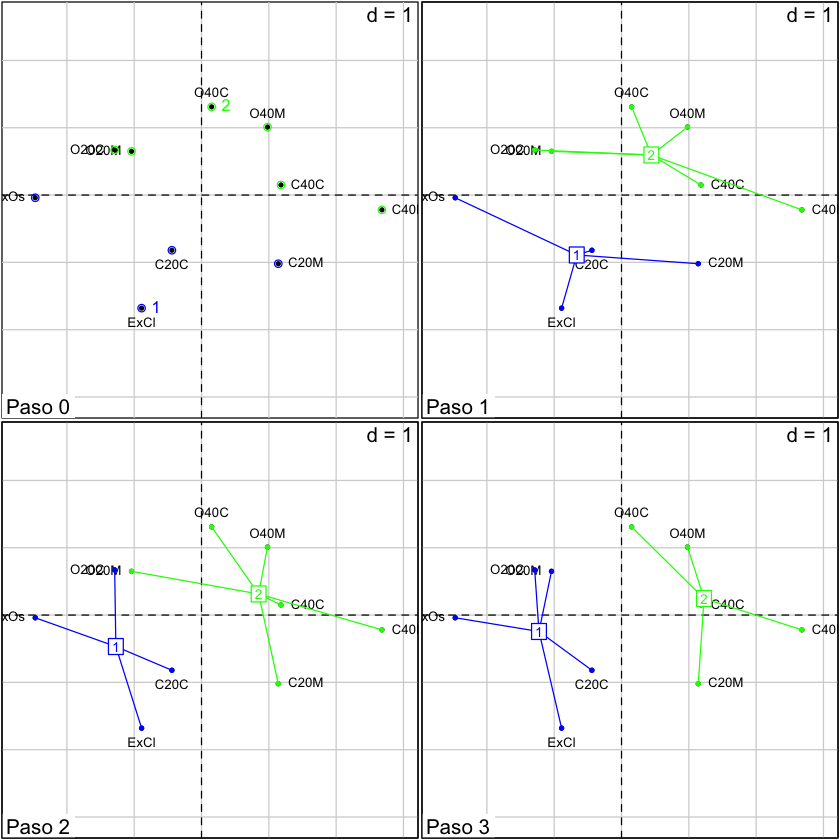

In [5]:

par(mfrow=c(2,2)) # 4 gráficas
plotfp(F,infaxes="no",main="Paso 0",cex=1.5)
text(x=cen[,1],y=cen[,2],labels=c("1","2"),col=c("blue","green"),pos=4)
points(F[tab[3,]==1,],col="blue")
points(F[tab[3,]==2,],col="green")
plotfp(F,infaxes="no",main="Paso 1",cex=1.5)
s.class(F,factor(tab[3,]),col=c("blue","green"),add.plot=TRUE,cellipse = 0)
plotfp(F,infaxes="no",main="Paso 2",cex=1.5)
s.class(F,factor(tab[6,]),col=c("blue","green"),add.plot=TRUE,cellipse = 0)
plotfp(F,infaxes="no",main="Paso 3",cex=1.5)
s.class(F,factor(tab[9,]),col=c("blue","green"),add.plot=TRUE,cellipse = 0)

<img src="../Imagenes/CafeToyKmeans.png" alt="drawing" width="800"/>

#### Ventajas del *K-means*

- es muy rápido
- poco exigente en recursos de cómputo



#### Desventajas del *K-means* 

- Con un método de agrupamiento se pretende descubrir una estructura de clases en los grupos y el algoritmo $K{-}means$ requiere que se le suministre el número de clases y los puntos iniciales.
- En general, la inercia mínima que se obtiene depende de los puntos iniciales.


[Volver al inicio](#Contenido)

# Métodos de clasificación jerárquica

- aglomerativos: en  Ciencias Naturales se denominan métodos de clasificación ascendente jerárquica aglomerativa
- divisivos  

**Estos métodos construyen una serie de particiones anidadas:** 

## Clasificación jerárquica aglomerativa

### Algoritmo

1. calcular la matriz de  distancias entre  los $n$ individuos, 
-unir los dos más cercanos para tener una partición de $n-1$ clases, 
2. calcular la distancia entre el nuevo grupo y los demás individuos, 
3. seleccionar  los dos más cercanos, para conseguir una partición en $n-2$ clases y 
4. continuar aglomerando hasta llegar a una partición de una clase con los $n$ individuos. 

- El proceso de uniones se representa en un árbol de clasificación o dendrograma. % indexado por las distancias de las uniones.
- Estos métodos requieren de un índice de similitud, disimilitud o distancia entre individuos. 
- En nuestro contexto se selecciona la distancia Euclidiana canónica.
- Al conformar grupos se necesita definir una distancia entre ellos, que se denomina criterio de agregación y que le da nombre a un método específico. Por ejemplo:

    - *enlace simple*: distancia entre los dos individuos más cercanos cada uno de diferente grupo
    - *enlace completo*: distancia entre los dos individuos más lejanos.}


## Distancias entre individuos

### Distancias para variables continuas

$$
{\large
  d: \Re^{p} \times \Re^{p}  \longrightarrow  \Re^{+} \cup \{ 0\} 
}  
$$
$$
{\large
        (i,l)                \ \ \  \  \ \           \longmapsto    d(i,l)
}        
$$

### Distancias disponibles en la función *dist{stats}*

##### Euclidiana

$$    
d(i,l) = \sqrt{\sum_{j=1}^{p} \left( x_{ij} - x_{lj} \right)^2}
$$       
    
##### Manhattan o Cityblock

$$
d(i,l) =\sum\limits_{j=1}^{p} \left| x_{ij} - x_{lj} \right|
$$

##### Minkowski

$$
\left(\sum\limits_{j=1}^{p} \left| x_{ij} - x_{lj} \right|^r \right)^{1/r}; r \in \Re
$$    

#####    Del máximo o de Chebychev

$$
\max\limits_{j} \{ x_{ij} - x_{lj} \}
$$

#####     Canberra

$$
\sum\limits_{j=1}^p \dfrac{|x_{ij}-x_{lj}|}{x_{ij}+x_{lj}}
$$


## Distancias entre variables binarias disponibles en *dist.binary{ade4}*

[ade4](https://pbil.univ-lyon1.fr/ade4/home.php?lang=eng)

Tabla de contingencia $2\times2$ contando coincidencias y no coindicencias de variables binarioas entre dos individos (n es el número de atributos):


                      Individuo l  
               
                     |   1  |  0   | suma
                     --------------------  
      Individuos  1  |   a  |  b   | n_j

         i        0  |   c  |  d   | c+d
                     -------------------- 
              suma   |  n_k | b+d  |  n
              


Details:

All these distances are of type $d = \sqrt{(1 - s)}$ with $s$ a similarity coefficient:

   1 = Jaccard index (1901) S3 coefficient of Gower Legendre: 
   $s_1 = \dfrac{a}{a+b+c}$

   2 = Simple matching coefficient of Sokal & Michener (1958) S4
          coefficient of Gower & Legendre: $s_2 = \dfrac{a+d}{a+b+c+d}$

   3 = Sokal & Sneath(1963) S5 coefficient of Gower & Legendre: 
   $s_3 = \dfrac{a}{a + 2(b + c)}$

   4 = Rogers & Tanimoto (1960) S6 coefficient of Gower & Legendre: 
   $s_4 = \dfrac{a + d}{a + 2(b + c) +d)}$

   5 = Dice (1945) or Sorensen (1948) S7 coefficient of Gower &
          Legendre: $s_5 =\dfrac{2a}{2a + b + c}$

   6 = Hamann coefficient S9 index of Gower & Legendre (1986): $s_6 = \dfrac{
          - (b + c) + d}{a + b + c + d}$

   7 = Ochiai (1957) S12 coefficient of Gower & Legendre: $s-7 = \dfrac{a}{
          \sqrt{(a + b)(a + c)}}$

   8 = Sokal & Sneath (1963) S13 coefficient of Gower & Legendre: $s_8 =
          \dfrac{ad}{\sqrt{(a + b)(a + c)(d + b)(d + c)}}$

   9 = Phi of Pearson S14 coefficient of Gower & Legendre: $s_9 = \dfrac{ad -
          bc}{\sqrt{(a + b)(a + c)(d + b)(d + c)}}$

  10 = S2 coefficient of Gower & Legendre: $s_{10} =\dfrac{a}{a + b + c + d}$


## Distancias entre grupos = métodos de agregación

### Enlace simple

### Enlace completo

#### Ejemplo de juguete utilizando la distancia de Manhatan entre individuos y el enlace completo como distancia entre grupos.
Sean los puntos a clasificar:

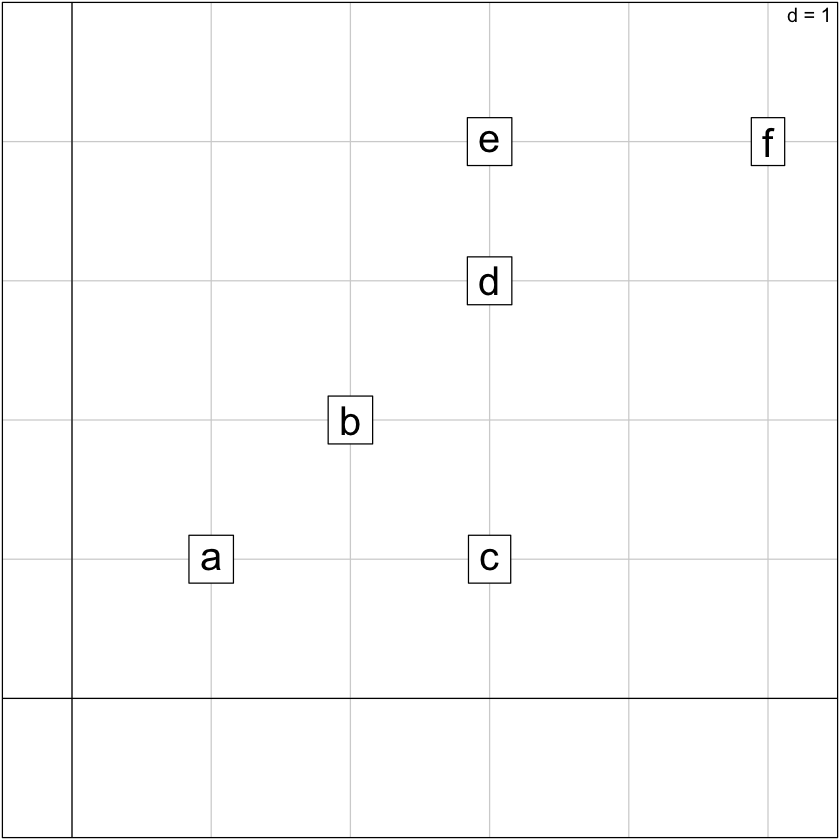

In [6]:
a<-c(1,1);b<-c(2,2);c<-c(3,1);d<-c(3,3);e<-c(3,4);f<-c(5,4)
X<-rbind(a,b,c,d,e,f)
s.label(X,clabel=2)

Las distancias de Manhattan son:

In [7]:
D<-dist(X,"manhattan");D

  a b c d e
b 2        
c 2 2      
d 4 2 2    
e 5 3 3 1  
f 7 5 5 3 2

##### Pasos
1. Se unen d y e a una distancia de 1
2. Se unen a y b a una distancia de 2
3. Se unen ab y c auna distancia de 2
4. Se unen de y f a una distancia de 3
5. Se unen abc y def a una distancia de 7

In [8]:
hc<-hclust(D)
data.frame(hc$merge,hc$height)

X1,X2,hc.height
<int>,<int>,<dbl>
-4,-5,1
-1,-2,2
-3,2,2
-6,1,3
3,4,7


#####  Árbol o dendrograma

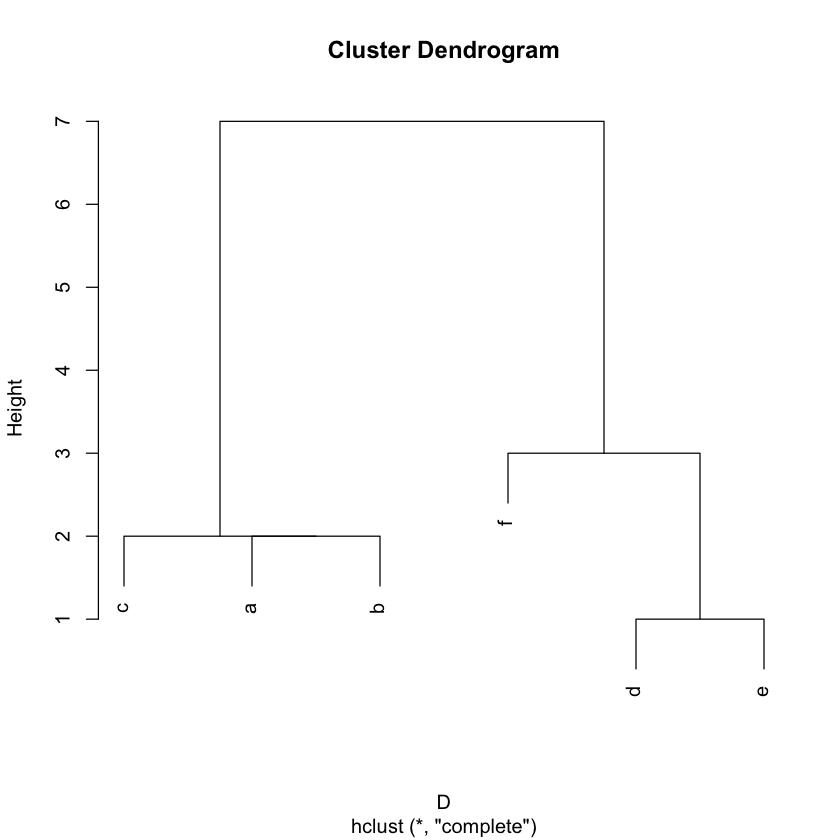

In [9]:
plot(hc)

##### Ultramétrica asociada al árbol

       | a | b | c | d | e
       -------------------
     b | 2 |       
     c | 2 | 2      
     d | 7 | 7 | 7    
     e | 7 | 7 | 7 | 1  
     f | 7 | 7 | 7 | 3 | 3

### Método de Ward 

-  $A$ y $B$  clases
no vacías y disyuntas y 
- pesos:  $p_{_A}$, $p_{_B}$ y 
- centros de gravedad $\mathbf{g}_{_A} $, $\mathbf{g}_{_B}$, 
- Inercias intra grupo: $I_{_A} $, $I_{_B}$ 
- $AB = A \bigcup  B$: $\mathbf{g}_{_{AB}}$ , $I_{AB}$
- Inercia entre $A$ y $B$ = $W(A,B)$

![Distancia de Ward](../Imagenes/Ward.png)

$$
Inercia-entre(A,B) = p_{_A} d^2(\mathbf{g}_{_{A}},\mathbf{g}_{_{AB}}) + p_{_B}  d^2(\mathbf{g}_{_{B}},\mathbf{g}_{_{AB}})
$$

- Distancia de Ward entre grupos
$$
 W(A,B) = \frac{p_{_A}  p_{_B}}{p_{_A} + p_{_B}}d^{2}(\mathbf{g}_{_A} , \mathbf{g}_{_B}) 
$$

-  incremento de la inercia intra-grupos al unir los
grupos $A$ y $B$ en uno solo. 

-  Distancia de Ward entre dos individuos $i$ 
y $l$

- Distancia de Ward entre individuos
$$
 W(i,l) = \frac{p_i  p_l}{p_i + p_l}d^{2}(i,l) 
$$

-  pesos  iguales a $1/n$ para los dos individuos
$$
 W(i,l) = \frac{1}{2n}d^{2}(i,l) 
$$
- $A$, $B$ y $C$ tres grupos presentes en el mismo
paso de construcción del árbol.

-  se unen $A$ y $B$ para formar el
grupo $AB$

-   Fórmula de recurrencia

- Distancia de Ward
$$
d(AB,C) = \frac{(p_{_A} + p_{_C})W(A,C)+(p_{_B} + p_{_C})W(B,C)-p_{_C} W(A,B)}{p_{_A} + p_{_B} + p_{_C}} 
$$


### Procedimiento para construir el árbol con el método de Ward

- Calcular la matriz de distancias de Ward entre parejas de individuos

- Seleccionar la pareja de grupos (individuos en el primer paso) que presente la menor distancia de Ward para conformar el nuevo grupo.
         
- Calcular las distancias entre todos los grupos y el grupo recién conformado utilizando la fórmula de distancia de Ward o la fórmula de recurrencia.

- Eliminar las filas y columnas correspondientes a los individuos o grupos unidos y adicionar una filay una columna para registrar las distancias entre el nuevo grupo y
los demás.
         
- Repetir el proceso hasta llegar a una sola clase.
     

### De inercia entre clases a inercia intra-clases y viceversa 

#### Al formar el árbol

- Antes de empezar las uniones toda la inercia corresponde a inercia
entre-clases (cada individuo es una clase)
- a medida que llevan a
cabo las uniones, la inercia entre-clases va pasando a inercia intra-clases
- al terminar, toda la inercia es intra-clases (todos los elementos
conforman una clase)
- la suma de los índices de nivel es igual a la inercia total 

#### Al cortar el árbol sucesivamente

- en dos clases: el último índice de nivel es la inercia entre las dos clases.
- en  tres clases: la inercia entre clases es la suma de los dos últimos índices de nivel.
- hasta $n$ clases de un individuo: toda la inercia es entre clases. 


### Ejemplo café

#### Distancias de Ward entre cafés


In [10]:
data(cafe)
Wcafe<-1/20*dist(F)^2;round(Wcafe,3)

      ExCl  C40M  C40C  C20M  C20C  ExOs  O40M  O40C  O20M
C40M 0.744                                                
C40C 0.382 0.119                                          
C20M 0.228 0.151 0.069                                    
C20C 0.047 0.505 0.178 0.127                              
ExOs 0.259 1.328 0.668 0.700 0.236                        
O40M 0.537 0.220 0.039 0.207 0.268 0.650                  
O40C 0.501 0.437 0.120 0.320 0.244 0.434 0.039            
O20M 0.273 0.730 0.259 0.377 0.126 0.126 0.211 0.093      
O20C 0.284 0.828 0.319 0.438 0.147 0.095 0.263 0.124 0.003

#### Construcción del árbol

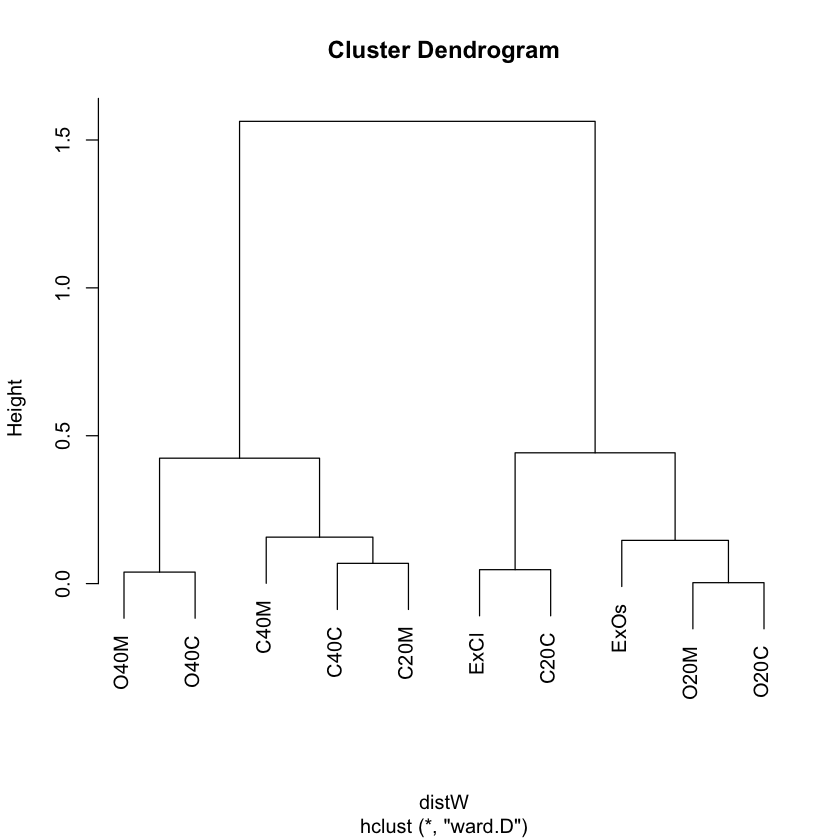

In [11]:
hclCafe<-ward.cluster(dista=dist(F),h.clust=1) # función de FactoClass
plot(hclCafe)

In [12]:
 W<-1/20*dist(F)^2;round(W,3)

      ExCl  C40M  C40C  C20M  C20C  ExOs  O40M  O40C  O20M
C40M 0.744                                                
C40C 0.382 0.119                                          
C20M 0.228 0.151 0.069                                    
C20C 0.047 0.505 0.178 0.127                              
ExOs 0.259 1.328 0.668 0.700 0.236                        
O40M 0.537 0.220 0.039 0.207 0.268 0.650                  
O40C 0.501 0.437 0.120 0.320 0.244 0.434 0.039            
O20M 0.273 0.730 0.259 0.377 0.126 0.126 0.211 0.093      
O20C 0.284 0.828 0.319 0.438 0.147 0.095 0.263 0.124 0.003

<img src="../Imagenes/CafeToyWard.png" alt="drawing" width="700"/>

In [13]:
hclCafe<-ward.cluster(dista=dist(F),h.clust=2) 
Nodo=hclCafe$Nodo;Ward=round(hclCafe$Indice,3);SumaWard=round(cumsum(hclCafe$Indice),3)
t(data.frame(Nodo,Ward,SumaWard))

Nodo,11,12,13,14,15,16,17,18,19
Ward,0.003,0.039,0.047,0.069,0.146,0.157,0.424,0.442,1.563
SumaWard,0.003,0.042,0.089,0.158,0.304,0.461,0.885,1.327,2.890


[Volver al inicio](#Contenido)

# Combinación de métodos
Desde el punto de vista del análisis de datos los métodos a utilizar son el de Ward de aglomeración jerárquica y el *K-means*, porque buscan grupos que tengan inercia intragrupos lo más baja posible. Estos métodos se complementan para subsanar entre sí las desventajas y aprovechar sus ventajas.

Los métodos de clasificación jerárquica tienen dos desventajas: utilizan mayor recurso de cómputo y las particiones obtenidas quedan anidadas. 

El *K-means* tiene también dos problemas: hay que darle el número de clases iniciales y los puntos iniciales. El número de clases es precisamente lo que se quiere descubrir en una tabla de datos y el óptimo es local, es decir, depende de los puntos iniciales.

La estrategia programada en DtmVic y FactoClass, combina los dos métodos, ya que sus ventajas y desventajas son complementarias. Cuando el número de elementos a clasificar no es tan grande y  el equipo de cálculo lo permite, se realiza la clasificación jerárquica aglomerativa con el método de Ward. El "histograma de índices de nivel" permite visualizar las mejores alturas de corte del árbol, y por ende, el número de clases. Luego, se disminuye la inercia intraclases de la partición obtenida utilizando  *K-means*, con los centros de gravedad de la partición derivada de cortar el árbol como puntos iniciales.


[Volver al inicio](#Contenido)

# Clasificación a partir de coordenadas

Los métodos factoriales se pueden utilizar para transformar los datos antes de realizar procedimientos de clasificación automática. Una de las salidas de un  análisis factorial es una tabla de individuos por coordenadas factoriales.  
Entonces, las columnas de las tablas de entrada de los métodos de clasificación son de la misma naturaleza: coordenadas factoriales, que se son variables continuas.  

En ese sentido, los métodos factoriales pueden cumplir  con dos funciones: la primera, en el caso de análisis de correspondencias, es la transformación de unas variables cualitativas en otras continuas; la segunda es una función de filtro, al considerar que los $S$ primeros ejes factoriales contienen la información y los otros son ruido. 

En otras palabras, *ACP* y los *AC*, son métodos de pretratamiento de datos para la clasificación que pueden cumplir con dos funciones: cuantificar las variables cualitativas y reducir la dimensionalidad de los datos.

<img src="../Imagenes/clasVarNom.png" alt="drawing" width="800"/>

## Función de transformación o cuantificación
Un programa de *ACP* normado  recibe los datos originales y los estandariza antes de obtener valores y vectores propios, y coordenadas factoriales de individuos y variables. 

En un análisis de correspondencias las coordenadas factoriales se constituyen en nuevas variables  continuas, con las que se puede utilizar la  combinación de métodos de clasificación para variables continuas.

## Función de filtro 
Conectar un método factorial con la clasificación da la posibilidad de seleccionar el número de ejes a utilizar en esta clasificación. 
Se utiliza el histograma de valores propios y otros criterios para la selección del número de ejes,  pero haciendo énfasis en el sentido de filtro: aquí seleccionar más ejes puede significar mayor recurso de cómputo, pero no más trabajo para el analista. 

En problemas pequeños y medianos el recurso de cómputo no tiene importancia. En general, el número de ejes para la clasificación es mayor que el número de ejes seleccionados para analizar en un método factorial. 

Muchas veces se utilizan todos los ejes para la clasificación, lo que es equivalente  a realizar el análisis con las variables originales.


[Volver al inicio](#Contenido)

# Caracterización automática de las clases
En términos generales, en un procedimiento de clasificación se obtiene una variable cualitativa indicadora de la clase o grupo al que pertenece cada elemento clasificado. Esta variable se puede cruzar con cualquiera de las variables presentes en la tabla de datos correspondiente. 

Los procedimientos para describir dos variables se pueden utilizar para ese propósito, en particular los ordenamientos por valores test. 

Las variables continuas o las categorías de las variables cualitativas con diferencias que generan un valor test superior a un umbral, generalmente 2, se dice que caracterizan a la clase. 

Las que generan valores test inferiores al umbral son de signo negativo (-2, por ejemplo) y se dice que caracterizan negativamente a la clase respectiva.

## Descripción con variables continuas
La clase es la variable cualitativa que se desea describir con las variables continuas.

Las variables continuas que caracterizan a una clase son aquellas que tienen la media de la clase suficientemente diferente de la media global. 

Para encontrarlas y ordenarlas se 
hace la comparación de la media dentro de la clase con la media global, siguiendo el procedimiento de ordenamiento mediante valores test.  

En la presentación de los resultados se pueden incluir los *boxplots* de las variables que caracterizan a una o más clases.

## Descripción con variables cualitativas
Una categoría es característica de una clase si su frecuencia dentro de la clase es suficientemente diferente de su frecuencia global. 

Para encontrarlas y ordenarlas se utiliza el procedimiento de valores test.

Para las variables que tengan categorías que caracterizan a las clases se pueden obtener las gráficas de perfiles de las clases 


## Una estrategia de clasificación
La estrategia de clasificación que se ha propuesto, se resume en los siguientes pasos:

1. Realizar el análisis en ejes principales correspondiente.
2. Seleccionar el número de ejes para la clasificación.
3. Si el número de "individuos" es muy grande, realizar un \emph{K-means} de preagrupamiento en miles de clases.
4. Realizar la clasificación jerárquica con el método de Ward sobre los "individuos" o los grupos del paso anterior.
5. Decidir el número de clases y cortar el árbol.
6. Realizar \emph{K-means} de consolidación partiendo de los centros de gravedad de la partición obtenida al cortar el árbol.
7. Caracterizar las clases.
8. Proyección de las clases sobre los planos factoriales.


In [14]:
# incluir figura estrategiaFactoClass.png

In [15]:
# poner el archivo ninios8a11.Rda y borrar esta celda

[Volver al inicio](#Contenido)

# Ejemplo de aplicación: clasificación de los niños según el consumo cultural

## Objetivo 
Complementar la descripción del consumo cultural realizada con análisis de correspondencias múltiples. 
Pardo CE (2020)  [Estadística descriptiva multivariada. Capítulo 6](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf )  

La función *FactoClass{FactoClass}*


In [16]:
load("../Datos/ninios8a11.Rda")
ninios8a11$Edad<-factor(ninios8a11$Edad)
# variables activas
Y <- subset(ninios8a11,select=c(Teat,Libr,Cine,Vide,Radi,Musi))
# variables suplementarias
Ys<-ninios8a11[,c(2,29,30,32,35)]

## Variables activas

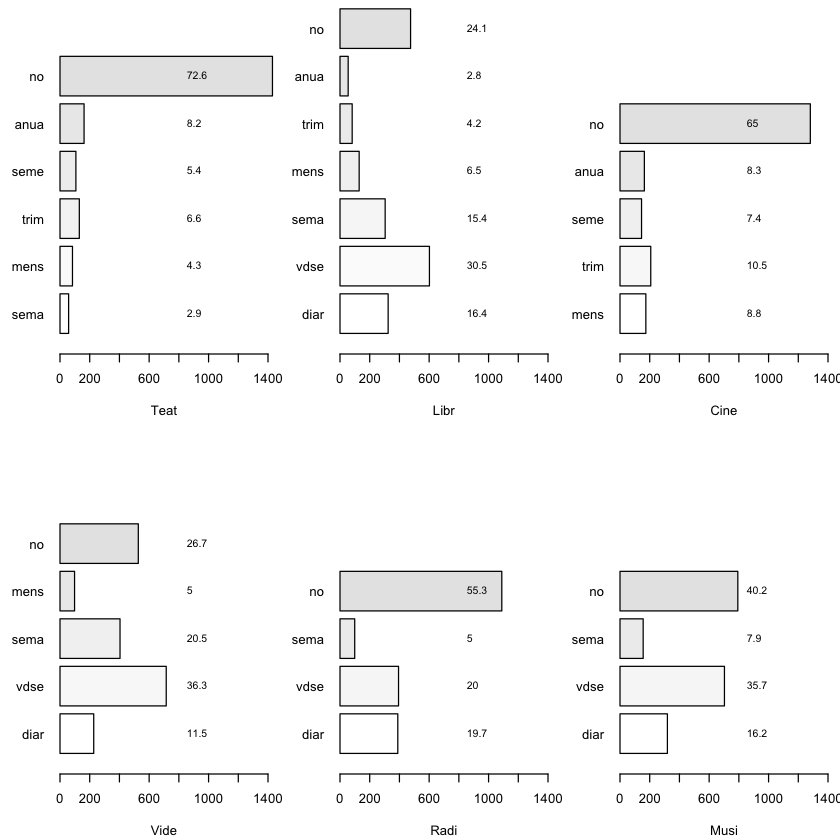

In [17]:
par(las=1,mfrow=c(2,3),mai=c(0.55,0.5,0.1,0.1))
for(i in 1:6){
  cat<-attributes(Y[,i])$levels;
  per<-tabulate(Y[,i])/nrow(Y)*100;
  pl<-plot(Y[,i],horiz=TRUE,col=gray(seq(1.0,0.9,
           length=length(cat))),ylim=c(0,8),
           xlim=c(0,1400),xlab=colnames(Y)[i]);
  text(800,pl,round(per,1),cex=0.8,pos=4); 
}  


## Variables ilustrativas

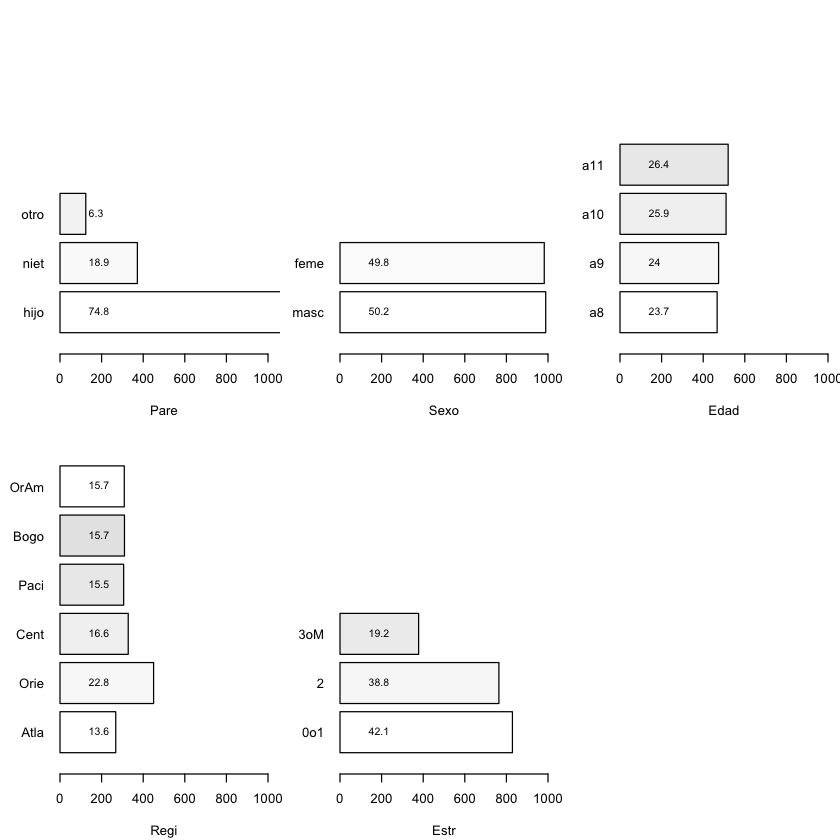

In [18]:
par(las=1,mfrow=c(2,3),mai=c(0.55,0.5,0,0.1))
for(i in 1:5){
  cat<-attributes(Y[,i])$levels;
  per<-tabulate(Ys[,i])/nrow(Y)*100;
  pl<-plot(Ys[,i],horiz=TRUE,col=gray(seq(1.0,0.9,
           length=length(cat))),ylim=c(0,8),
           xlim=c(0,1000),xlab=colnames(Ys)[i]);
  text(100,pl,round(per,1),cex=0.8,pos=4); 
}

In [19]:
library(FactoClass)

In [20]:
fcConCul <- FactoClass(dfact=Y,metodo=dudi.acm,dfilu=Ys , nf = 3, nfcl = 5, k.clust = 4, 
                 scanFC = FALSE)


The number of retained axes for factorial analysis is  3 

The number of axes for clustering is  5 

Look the histogram of 25 indexes 
Partition in  4  clusters


In [21]:
names(fcConCul)

[1] "dudi2"      "dudi"       "nfcl"       "k"          "indices"   
 [6] "cluster"    "cor.clus"   "clus.summ"  "carac.cont" "carac.cate"
[11] "carac.frec"

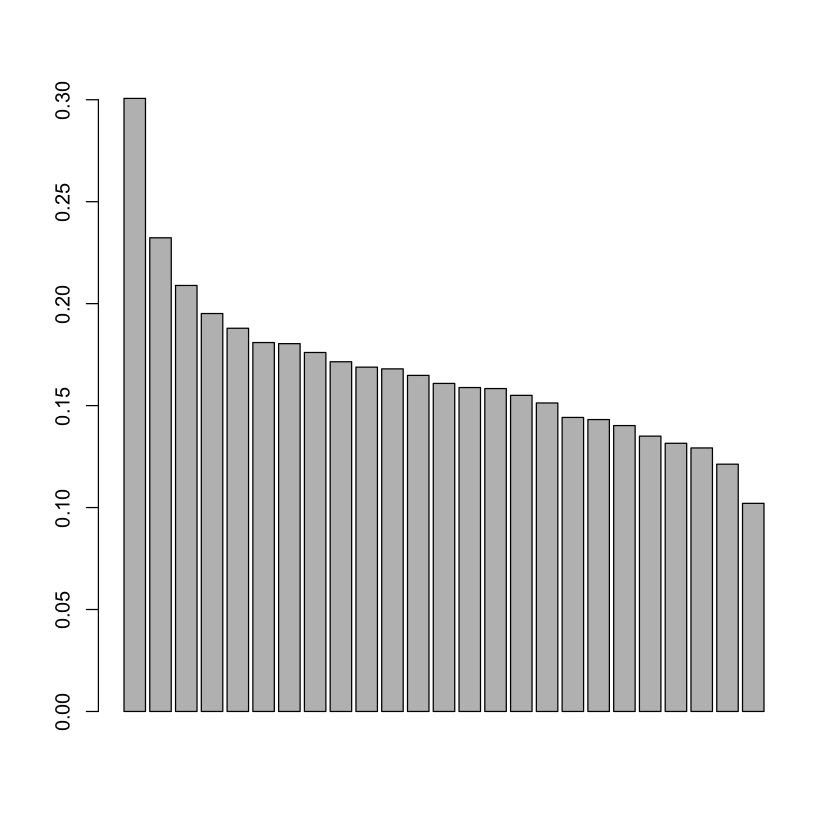

In [22]:
barplot(fcConCul$dudi$eig)

,Nodo,Prim,Benj,Indice
,<fct>,<fct>,<fct>,<dbl>
1951,3922,3872,3880,0.008481887
1952,3923,3871,3916,0.009042694
1953,3924,3886,3907,0.009735317
1954,3925,3883,3891,0.009909993
1955,3926,3896,3909,0.010150002
1956,3927,3908,3924,0.010420663
1957,3928,3912,3925,0.015028345
1958,3929,3918,3922,0.015680180
1959,3930,3913,3921,0.019286347


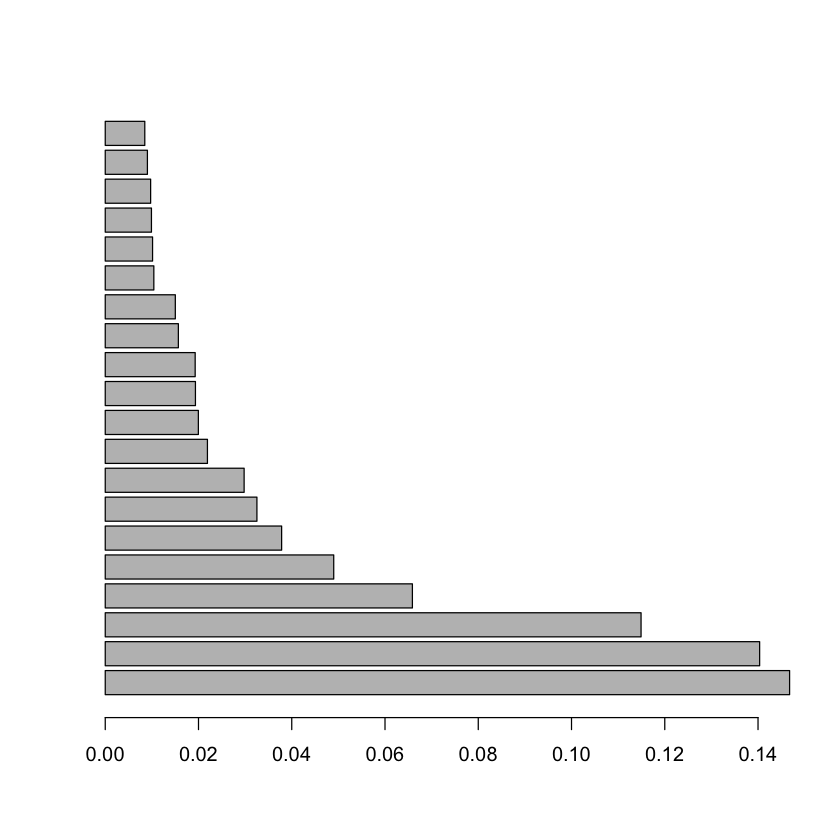

In [23]:
ultimosNodos<-tail(fcConCul$indices,20)
ultimosNodos
barplot(ultimosNodos$Indice[20:1],horiz=TRUE)

1   2   3   4 
275 637 680 379

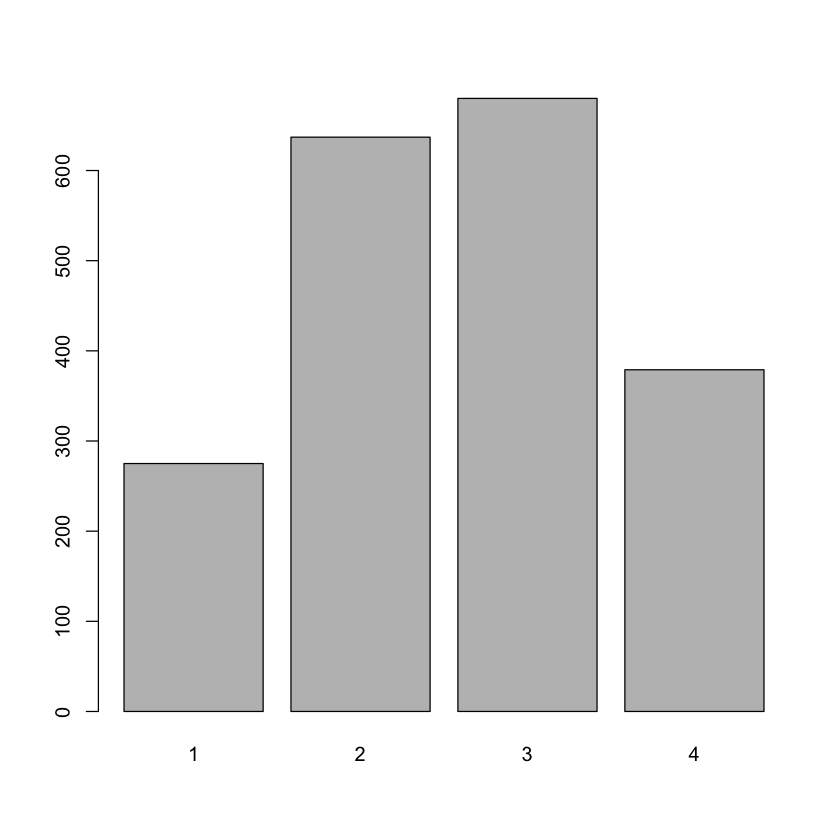

In [24]:
summary(fcConCul$cluster)
barplot(summary(fcConCul$cluster))

In [25]:
fcConCul$clus.summ

,Bef.Size,Aft.Size,Bef.Inertia,Aft.Inertia,Bef.Weight,Aft.Weight,Bef.Dist_2,Aft.Dist_2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,310,275,0.1812,0.1520,0.1573,0.1395,0.7341,0.8417
2,592,637,0.2117,0.2064,0.3004,0.3232,0.2625,0.2976
3,530,680,0.1105,0.1407,0.2689,0.3450,0.3780,0.3626
4,539,379,0.2196,0.1544,0.2735,0.1923,0.4090,0.7021
TOTAL,1971,1971,0.7230,0.6535,1.0001,1.0000,NA,NA


In [26]:
fcConCul$carac.cate

class: 1
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Musi.sema     23.962   0.000      92.9      52.7    7.9    156
Vide.mens     15.698   0.000      81.6      29.1    5.0     98
Radi.sema     15.600   0.000      80.8      29.1    5.0     99
Teat.trim      4.752   0.000      29.2      13.8    6.6    130
Vide.sema      4.503   0.000      21.0      30.9   20.5    404
Libr.sema      4.283   0.000      22.0      24.4   15.4    304
Teat.sema      2.858   0.004      27.6       5.8    2.9     58
Cine.anua      2.444   0.015      20.1      12.0    8.3    164
Regi.Cent      2.437   0.015      18.0      21.5   16.6    328
Regi.Atla      2.330   0.020      18.3      17.8   13.6    268
Teat.anua      2.312   0.021      19.8      11.6    8.2    162
Cine.trim      2.264   0.024      18.8      14.2   10.5    207
Libr.mens      2.193   0.028      20.2       9.5    6.5    129
Libr.anua      2.112   0.035      23.6       4.7    2.8     55
Regi.Bogo      2.097   0.036      17.4      19

In [27]:
 cluster.carac(Y,fcConCul$cluster,tipo.v="no",v.lim= 5,dn=3,dm=3,neg=TRUE)
    

class: 1
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Musi.sema     23.962       0      92.9      52.7    7.9    156
Vide.mens     15.698       0      81.6      29.1    5.0     98
Radi.sema     15.600       0      80.8      29.1    5.0     99
Musi.vdse     -5.105       0       8.8      22.5   35.7    703
Teat.no       -5.485       0      11.3      58.5   72.6   1430
Musi.diar     -5.568       0       5.0       5.8   16.2    319
Radi.no       -6.560       0       9.4      37.1   55.3   1089
Vide.no       -7.253       0       5.3      10.2   26.7    527
Musi.no       -8.124       0       6.6      18.9   40.2    793
------------------------------------------------------------ 
class: 2
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Musi.vdse     27.667       0      71.1      78.5   35.7    703
Vide.vdse     18.830       0      58.7      65.9   36.3    715
Radi.vdse     13.752       0      62.2      38.5   20.0    394
Libr.vdse      9.652       0      47.8

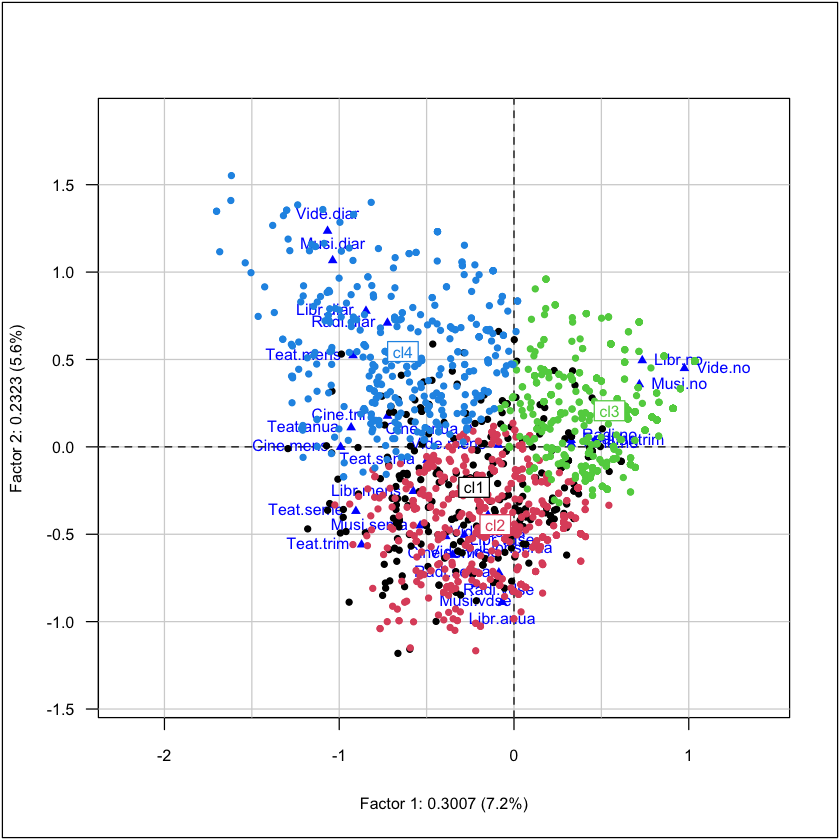

In [28]:
plotFactoClass(fcConCul,roweti="",cstar=0)

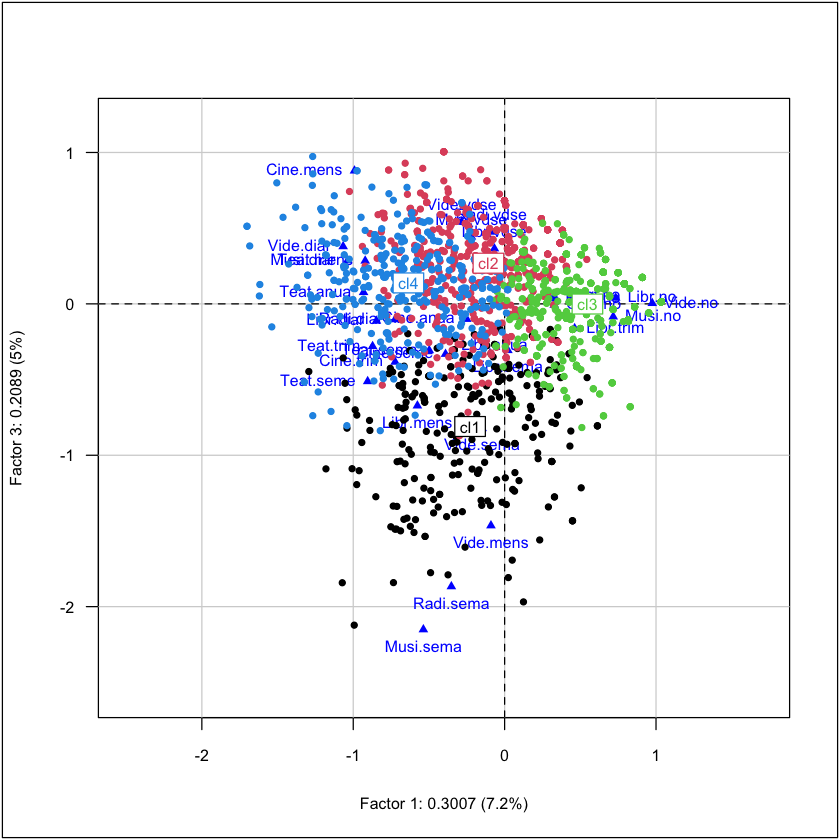

In [29]:
plotFactoClass(fcConCul,x=1,y=3,roweti="",cstar=0)

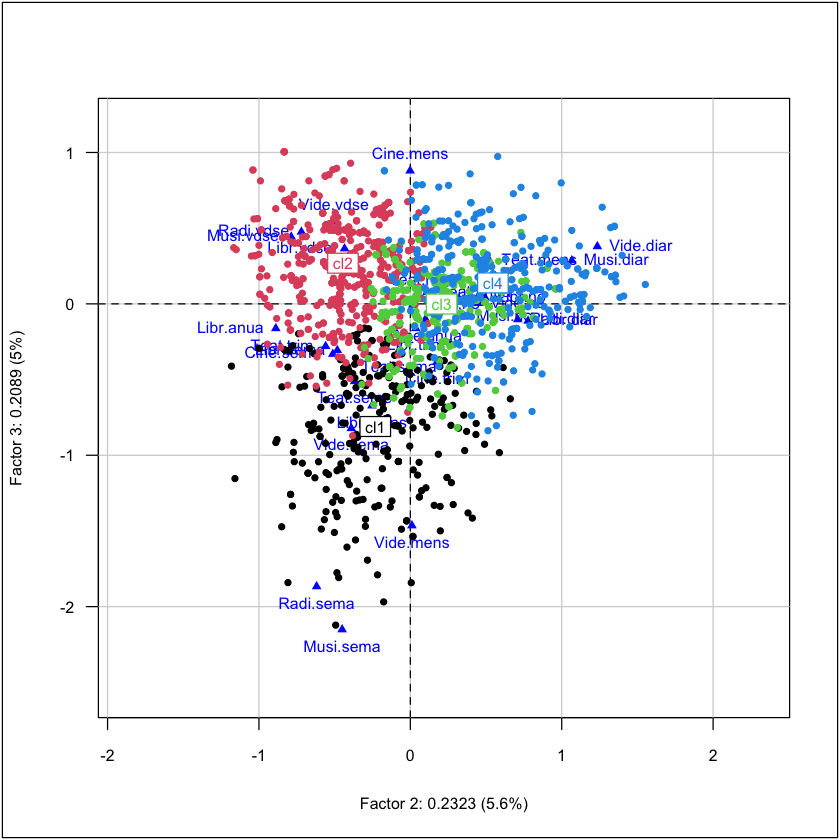

In [30]:
plotFactoClass(fcConCul,x=2,y=3,roweti="",cstar=0)

#### Caracterización de las clases con variables ilustrativas

In [31]:
cluster.carac(Ys,fcConCul$cluster,tipo.v="no",v.lim= 2,dn=3,dm=3,neg=TRUE)
    

class: 1
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Regi.Cent      2.437   0.015      18.0      21.5   16.6    328
Regi.Atla      2.330   0.020      18.3      17.8   13.6    268
Regi.Bogo      2.097   0.036      17.4      19.6   15.7    310
Regi.Orie     -3.929   0.000       8.7      14.2   22.8    450
------------------------------------------------------------ 
class: 2
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Estr.3oM       2.375   0.018      37.0      22.0   19.2    378
Regi.Cent     -2.178   0.029      27.7      14.3   16.6    328
Estr.0o1      -2.998   0.003      28.8      37.5   42.1    829
------------------------------------------------------------ 
class: 3
          Test.Value p.Value Class.Cat Cat.Class Global Weight
Estr.0o1       8.366   0.000      45.0      54.9   42.1    829
Regi.Orie      5.393   0.000      45.1      29.9   22.8    450
Regi.OrAm      3.766   0.000      43.7      19.9   15.7    309
Edad.a10      -2.085   0.037  

[Volver al inicio](#Contenido)

# FIN